In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2

from math import sqrt
sns.set()

In [2]:
raw_data = pd.read_csv('dataset/daily-min-temperatures.csv')

In [4]:
df_copy = raw_data.copy()

In [5]:
df_copy.describe()

,Temp
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


In [6]:
df_copy.isna().sum() # initially no missing values

Date    0
Temp    0
dtype: int64

In [7]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3650 non-null   object 
 1   Temp    3650 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB


In [8]:
## since date is an object, let us convert it to date_time obejct

df_copy['Date'] = pd.to_datetime(df_copy['Date'])

In [11]:
df_copy.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [21]:
## the period of the dataset is daily -- recorded every day

In [12]:
## make the date_time as index,, makes our analysis easier

df_copy.set_index('Date',inplace=True)

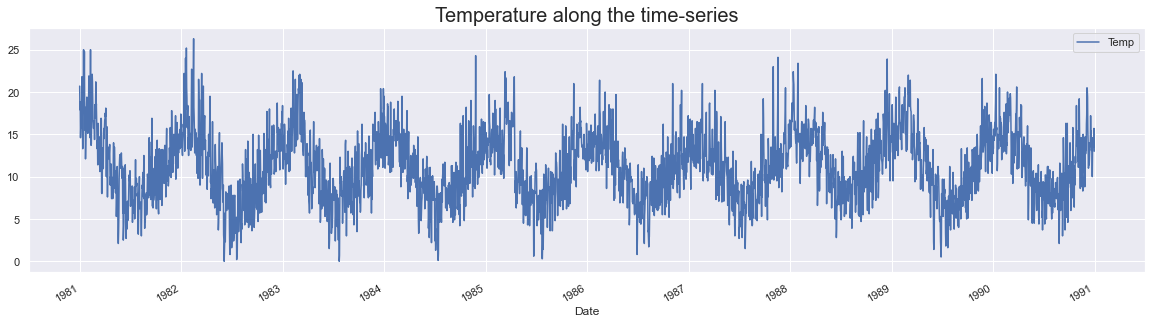

In [15]:
df_copy.plot(figsize=(20,5))
plt.title('Temperature along the time-series',size=20)
plt.show()

In [16]:
# we can see some patterns in the data which is being repeated after certrain interval,, this shows that tempetatue
## is a seasonal variable, which repeates after certain interval(every year)

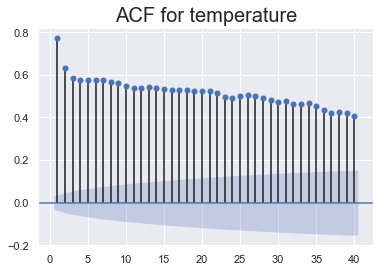

In [18]:
sgt.plot_acf(df_copy.Temp,lags=40,zero=False)
plt.title('ACF for temperature',size=20)
plt.show()

In [20]:
## the decreasing trend in auto-correlation,,
## the more back in time we go ,,the less impacat it makes to the current variable/ value of temp

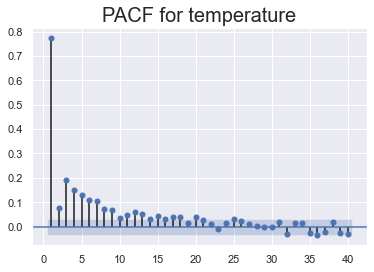

In [22]:
sgt.plot_pacf(df_copy.Temp,lags=40,zero=False)
plt.title('PACF for temperature',size=20)
plt.show()

In [26]:
## until 8th lag the error seems significant,, and random later on
## coeff value after 18th lag is close to zero, thus the impact of coeff after 18th lag to the model is minimal
## negative after 30th lag indicates, cyclical changes every month
# sice first lag is greatly significant we should include it in our model

### AR(1)

In [27]:
model_ar_1 = ARMA(df_copy['Temp'],order=(1,0))
result_ar_1 = model_ar_1.fit()
result_ar_1.summary()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   Temp   No. Observations:                 3650
Model:                     ARMA(1, 0)   Log Likelihood               -8629.862
Method:                       css-mle   S.D. of innovations              2.574
Date:                Tue, 19 Jan 2021   AIC                          17265.725
Time:                        15:53:52   BIC                          17284.332
Sample:                             0   HQIC                         17272.352
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.1885      0.189     59.085      0.000      10.817      11.560
ar.L1.Temp     0.7753      0.010     74.079      0.000       0.755       0.796
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2899           +0.0000j            1.2899            0.0000
-----------------------------------------------------------------------------
"""

In [28]:
## lag one-day before is significant

In [29]:
model_ar_2 = ARMA(df_copy['Temp'],order=(2,0))
result_ar_2 = model_ar_2.fit()
result_ar_2.summary()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   Temp   No. Observations:                 3650
Model:                     ARMA(2, 0)   Log Likelihood               -8618.979
Method:                       css-mle   S.D. of innovations              2.566
Date:                Tue, 19 Jan 2021   AIC                          17245.958
Time:                        15:54:36   BIC                          17270.767
Sample:                             0   HQIC                         17254.793
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.1908      0.205     54.695      0.000      10.790      11.592
ar.L1.Temp     0.7155      0.017     43.347      0.000       0.683       0.748
ar.L2.Temp     0.0772      0.017      4.673      0.000       0.045       0.110
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2335           +0.0000j            1.2335            0.0000
AR.2          -10.5058           +0.0000j           10.5058            0.5000
-----------------------------------------------------------------------------
"""

In [30]:
model_ar_5 = ARMA(df_copy['Temp'],order=(5,0))
result_ar_5 = model_ar_5.fit()
result_ar_5.summary()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   Temp   No. Observations:                 3650
Model:                     ARMA(5, 0)   Log Likelihood               -8478.123
Method:                       css-mle   S.D. of innovations              2.469
Date:                Tue, 19 Jan 2021   AIC                          16970.247
Time:                        15:54:56   BIC                          17013.664
Sample:                             0   HQIC                         16985.709
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.2161      0.330     34.013      0.000      10.570      11.862
ar.L1.Temp     0.6523      0.016     39.734      0.000       0.620       0.684
ar.L2.Temp    -0.0609      0.020     -3.103      0.002      -0.099      -0.022
ar.L3.Temp     0.0909      0.020      4.638      0.000       0.052       0.129
ar.L4.Temp     0.0638      0.020      3.251      0.001       0.025       0.102
ar.L5.Temp     0.1305      0.016      7.947      0.000       0.098       0.163
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0669           -0.0000j            1.0669           -0.0000
AR.2            0.5767           -1.3544j            1.4720           -0.1859
AR.3            0.5767           +1.3544j            1.4720            0.1859
AR.4           -1.3547           -1.2164j            1.8206           -0.3836
AR.5           -1.3547           +1.2164j            1.8206            0.3836
-----------------------------------------------------------------------------
"""

In [33]:
## lag 5 days before is also significant-- this show some todays temp is dependent on temp value 5 days ahead

In [32]:
model_ar_10 = ARMA(df_copy['Temp'],order=(10,0))
result_ar_10 = model_ar_10.fit()
result_ar_10.summary()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   Temp   No. Observations:                 3650
Model:                    ARMA(10, 0)   Log Likelihood               -8414.129
Method:                       css-mle   S.D. of innovations              2.426
Date:                Tue, 19 Jan 2021   AIC                          16852.258
Time:                        15:56:16   BIC                          16926.688
Sample:                             0   HQIC                         16878.764
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          11.2669      0.492     22.918      0.000      10.303      12.230
ar.L1.Temp      0.6108      0.017     36.919      0.000       0.578       0.643
ar.L2.Temp     -0.0825      0.019     -4.255      0.000      -0.120      -0.044
ar.L3.Temp      0.0629      0.019      3.239      0.001       0.025       0.101
ar.L4.Temp      0.0515      0.019      2.652      0.008       0.013       0.090
ar.L5.Temp      0.0544      0.019      2.798      0.005       0.016       0.092
ar.L6.Temp      0.0424      0.019      2.183      0.029       0.004       0.080
ar.L7.Temp      0.0598      0.019      3.079      0.002       0.022       0.098
ar.L8.Temp      0.0331      0.019      1.707      0.088      -0.005       0.071
ar.L9.Temp      0.0502      0.019      2.590      0.010       0.012       0.088
ar.L10.Temp     0.0364      0.017      2.197      0.028       0.004       0.069
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             1.0264           -0.0000j            1.0264           -0.0000
AR.2             0.9796           -0.7927j            1.2601           -0.1083
AR.3             0.9796           +0.7927j            1.2601            0.1083
AR.4             0.4189           -1.3016j            1.3674           -0.2004
AR.5             0.4189           +1.3016j            1.3674            0.2004
AR.6            -0.4319           -1.3910j            1.4565           -0.2979
AR.7            -0.4319           +1.3910j            1.4565            0.2979
AR.8            -1.2984           -0.8684j            1.5620           -0.4062
AR.9            -1.2984           +0.8684j            1.5620            0.4062
AR.10           -1.7428           -0.0000j            1.7428           -0.5000
------------------------------------------------------------------------------
"""

In [34]:
## temp for 8 th lag is not significant 

In [48]:
model_ar_7 = ARMA(df_copy['Temp'],order=(7,0))
result_ar_7 = model_ar_7.fit()
result_ar_7.summary()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   Temp   No. Observations:                 3650
Model:                     ARMA(7, 0)   Log Likelihood               -8436.422
Method:                       css-mle   S.D. of innovations              2.441
Date:                Tue, 19 Jan 2021   AIC                          16890.843
Time:                        16:11:11   BIC                          16946.666
Sample:                             0   HQIC                         16910.723
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.2378      0.408     27.512      0.000      10.437      12.038
ar.L1.Temp     0.6266      0.016     38.046      0.000       0.594       0.659
ar.L2.Temp    -0.0740      0.019     -3.803      0.000      -0.112      -0.036
ar.L3.Temp     0.0736      0.019      3.782      0.000       0.035       0.112
ar.L4.Temp     0.0622      0.019      3.193      0.001       0.024       0.100
ar.L5.Temp     0.0661      0.019      3.397      0.001       0.028       0.104
ar.L6.Temp     0.0437      0.019      2.247      0.025       0.006       0.082
ar.L7.Temp     0.1035      0.016      6.283      0.000       0.071       0.136
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0403           -0.0000j            1.0403           -0.0000
AR.2            0.8385           -1.0210j            1.3211           -0.1406
AR.3            0.8385           +1.0210j            1.3211            0.1406
AR.4           -0.1916           -1.4566j            1.4691           -0.2708
AR.5           -0.1916           +1.4566j            1.4691            0.2708
AR.6           -1.3783           -0.7524j            1.5703           -0.4205
AR.7           -1.3783           +0.7524j            1.5703            0.4205
-----------------------------------------------------------------------------
"""

In [47]:
model_ar_8 = ARMA(df_copy['Temp'],order=(8,0))
result_ar_8 = model_ar_8.fit()
result_ar_8.summary()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   Temp   No. Observations:                 3650
Model:                     ARMA(8, 0)   Log Likelihood               -8426.139
Method:                       css-mle   S.D. of innovations              2.434
Date:                Tue, 19 Jan 2021   AIC                          16872.277
Time:                        16:10:49   BIC                          16934.302
Sample:                             0   HQIC                         16894.366
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.2474      0.440     25.543      0.000      10.384      12.110
ar.L1.Temp     0.6188      0.017     37.482      0.000       0.586       0.651
ar.L2.Temp    -0.0773      0.019     -3.982      0.000      -0.115      -0.039
ar.L3.Temp     0.0687      0.019      3.533      0.000       0.031       0.107
ar.L4.Temp     0.0576      0.019      2.959      0.003       0.019       0.096
ar.L5.Temp     0.0606      0.019      3.114      0.002       0.022       0.099
ar.L6.Temp     0.0493      0.019      2.538      0.011       0.011       0.087
ar.L7.Temp     0.0565      0.019      2.912      0.004       0.018       0.095
ar.L8.Temp     0.0750      0.017      4.541      0.000       0.043       0.107
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0339           -0.0000j            1.0339           -0.0000
AR.2            0.8984           -0.9250j            1.2895           -0.1273
AR.3            0.8984           +0.9250j            1.2895            0.1273
AR.4            0.0697           -1.4142j            1.4159           -0.2422
AR.5            0.0697           +1.4142j            1.4159            0.2422
AR.6           -1.6184           -0.0000j            1.6184           -0.5000
AR.7           -1.0526           -1.1325j            1.5461           -0.3692
AR.8           -1.0526           +1.1325j            1.5461            0.3692
-----------------------------------------------------------------------------
"""

In [50]:
llr_test(model_ar_7,model_ar_8) # model 8 better than 7 ----- complex model better than the simpler one

0.0

### LLR test

In [35]:
def llr_test(model_1,model_2,df=1):
    L1 = model_1.fit().llf
    L2 = model_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR,df).round(3)
    return p

In [36]:
## comparing higher lag AR models

In [38]:
llr_test(model_ar_2,model_ar_5,df=3) # model 5 better than model 2

0.0

In [43]:
## higher the lag, better the AR model , especially when the data is non-stationary

## Stationarity Check DFTest

In [44]:
sts.adfuller(df_copy.Temp)

(-4.44480492461168,
 0.0002470826300361191,
 20,
 3629,
 {'1%': -3.4321532327220154,
  '5%': -2.862336767636517,
  '10%': -2.56719413172842},
 16642.822304301197)

In [45]:
# p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
# p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [46]:
## this suggest that the data is stationary

In [52]:
## residuals

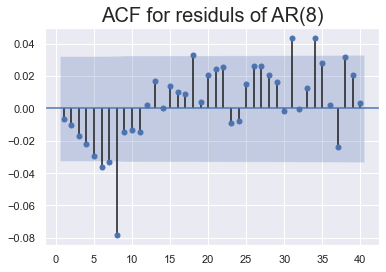

In [55]:
df_copy['res_ar_8']=result_ar_8.resid
sgt.plot_acf(df_copy.res_ar_8,lags=40,zero=False)
plt.title('ACF for residuls of AR(8)',size=20)
plt.show()

In [56]:
df_copy.res_ar_8.mean()

-0.0072917304096848925

In [57]:
df_copy.res_ar_8.var()

5.9404325060843695

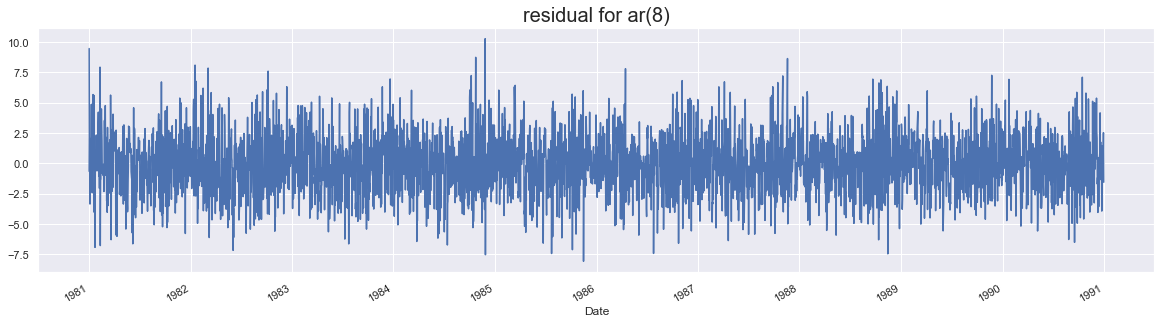

In [59]:
df_copy.res_ar_8.plot(figsize=(20,5))
plt.title('residual for ar(8)',size=20)
plt.show()
